 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
whale_returns_data = Path("../Starter_Code/Resources/whale_returns.csv")

In [3]:
# Reading whale returns
whale_returns = pd.read_csv(
    whale_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True
)
whale_returns.sort_index(inplace=True)

In [4]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
algo_returns_data = Path("../Starter_Code/Resources/algo_returns.csv")
algo_returns=pd.read_csv(
    algo_returns_data, 
    index_col="Date",
    infer_datetime_format=True,
    parse_dates=True
)
algo_returns.sort_index(inplace=True)

In [7]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_returns.dropna(inplace=True)

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_60_data = Path("../Starter_Code/Resources/sp_tsx_history.csv")
sp_tsx_60 = pd.read_csv(
    sp_tsx_60_data,
    infer_datetime_format=True,
    index_col="Date",
    parse_dates=True
)
sp_tsx_60.sort_index(inplace=True)
sp_tsx_60.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [10]:
# Check Data Types
sp_tsx_60.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
# sp_tsx_60.Close = [x.strip('$') for x in sp_tsx_60.Close]
sp_tsx_60["Close"] = sp_tsx_60["Close"].apply(lambda x: str(x.split()[0].replace("$", "")))
sp_tsx_60["Close"] = sp_tsx_60["Close"].apply(lambda x: str(x.split()[0].replace(",", "")))

In [12]:
# convert to float
sp_tsx_60["Close"] = sp_tsx_60["Close"].astype(float)

In [13]:
# Calculate Daily Returns
sp_tsx_60["Close"] = sp_tsx_60["Close"].pct_change()

In [14]:
# Drop nulls
sp_tsx_60.dropna(inplace=True)

In [15]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_60.rename(columns={"Close": "S&P TSX"}, inplace=True)

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
all_portfolios = pd.concat([whale_returns, algo_returns, sp_tsx_60], axis="columns", join="inner")
all_portfolios

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

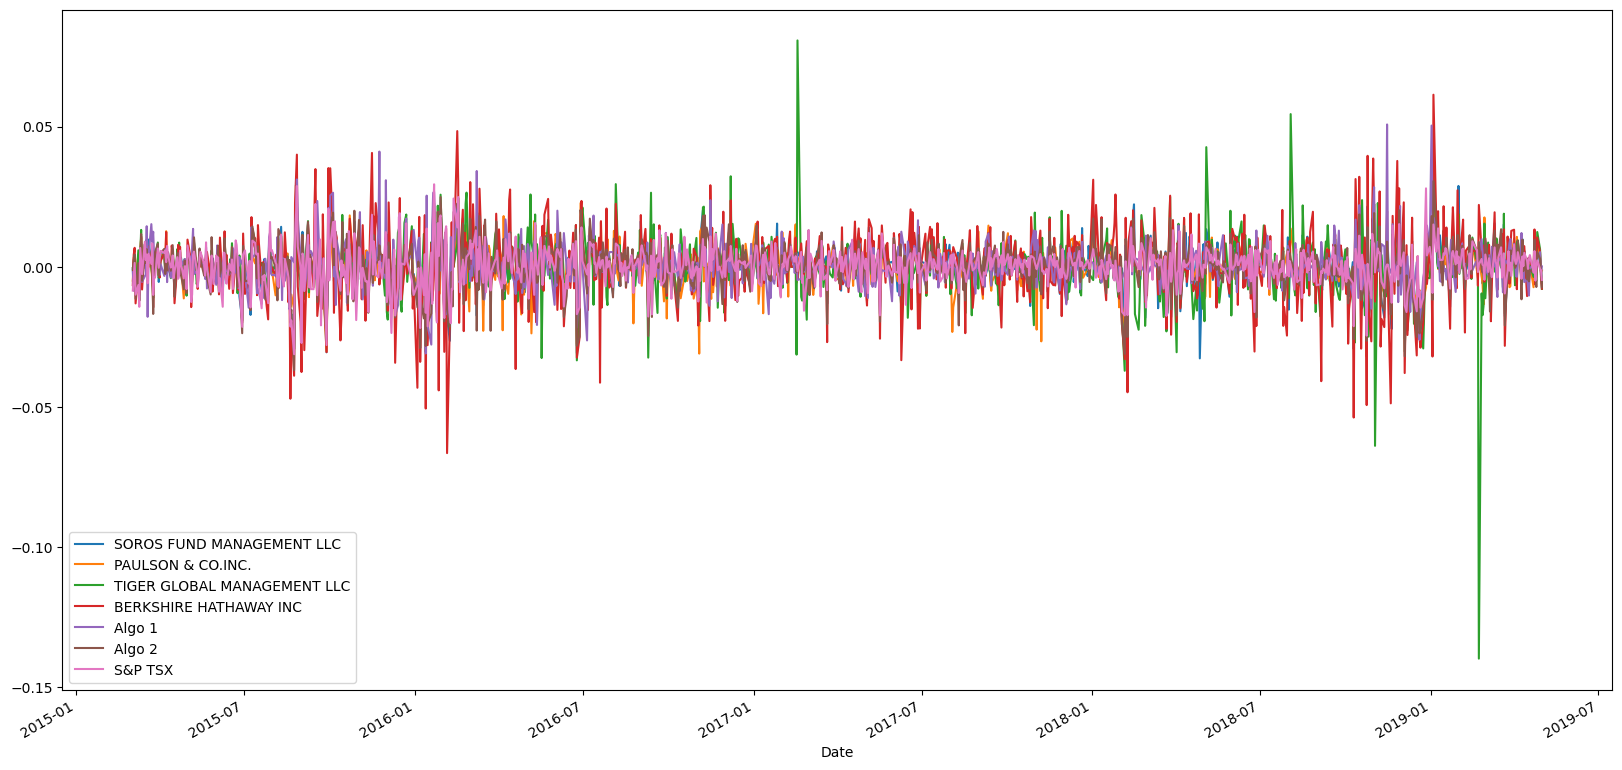

In [17]:
# Plot daily returns of all portfolios
all_portfolios
all_portfolios.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

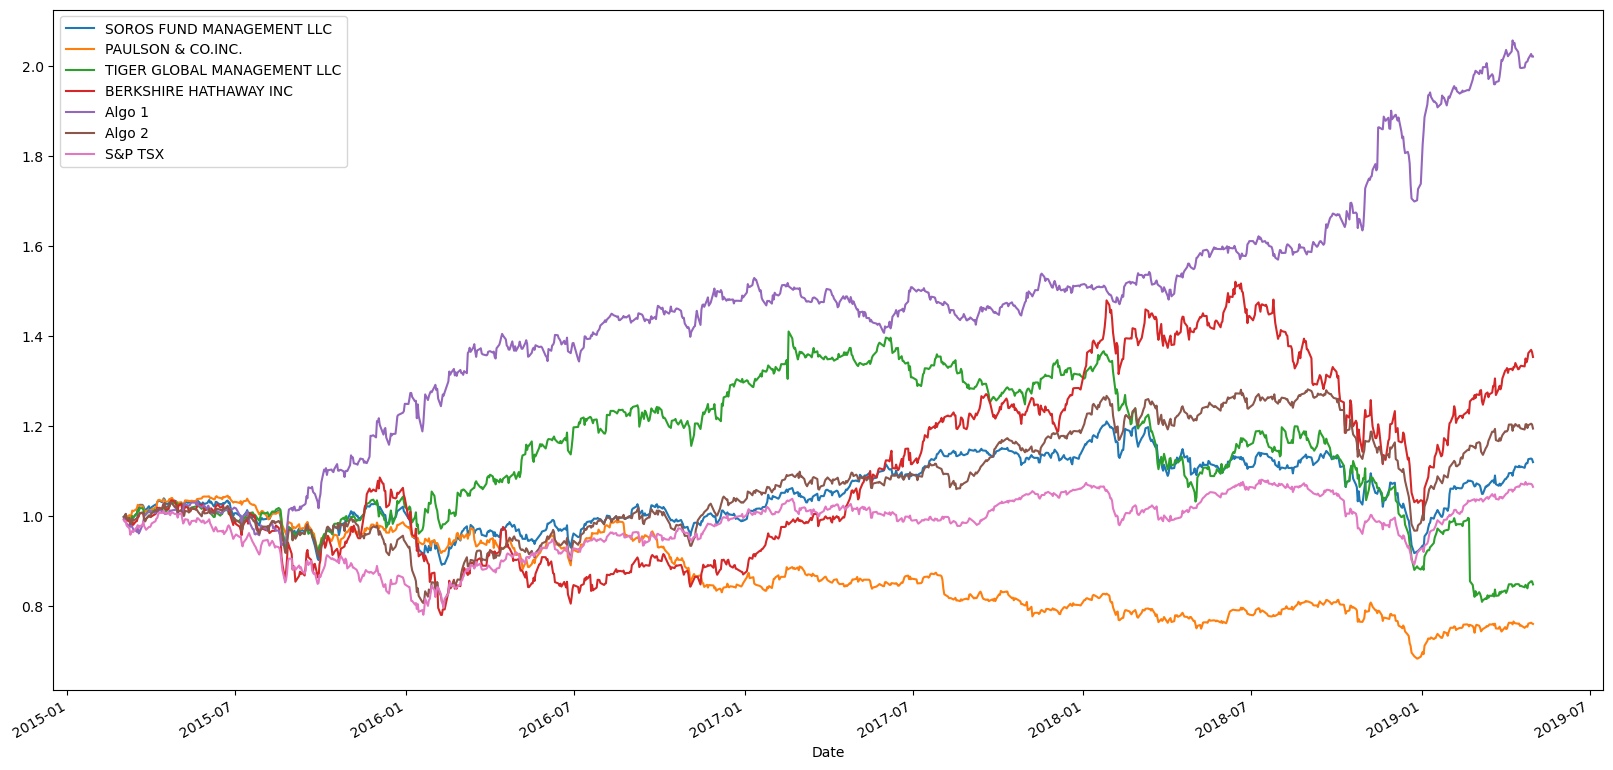

In [18]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + all_portfolios).cumprod()
cumulative_returns.head()
# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

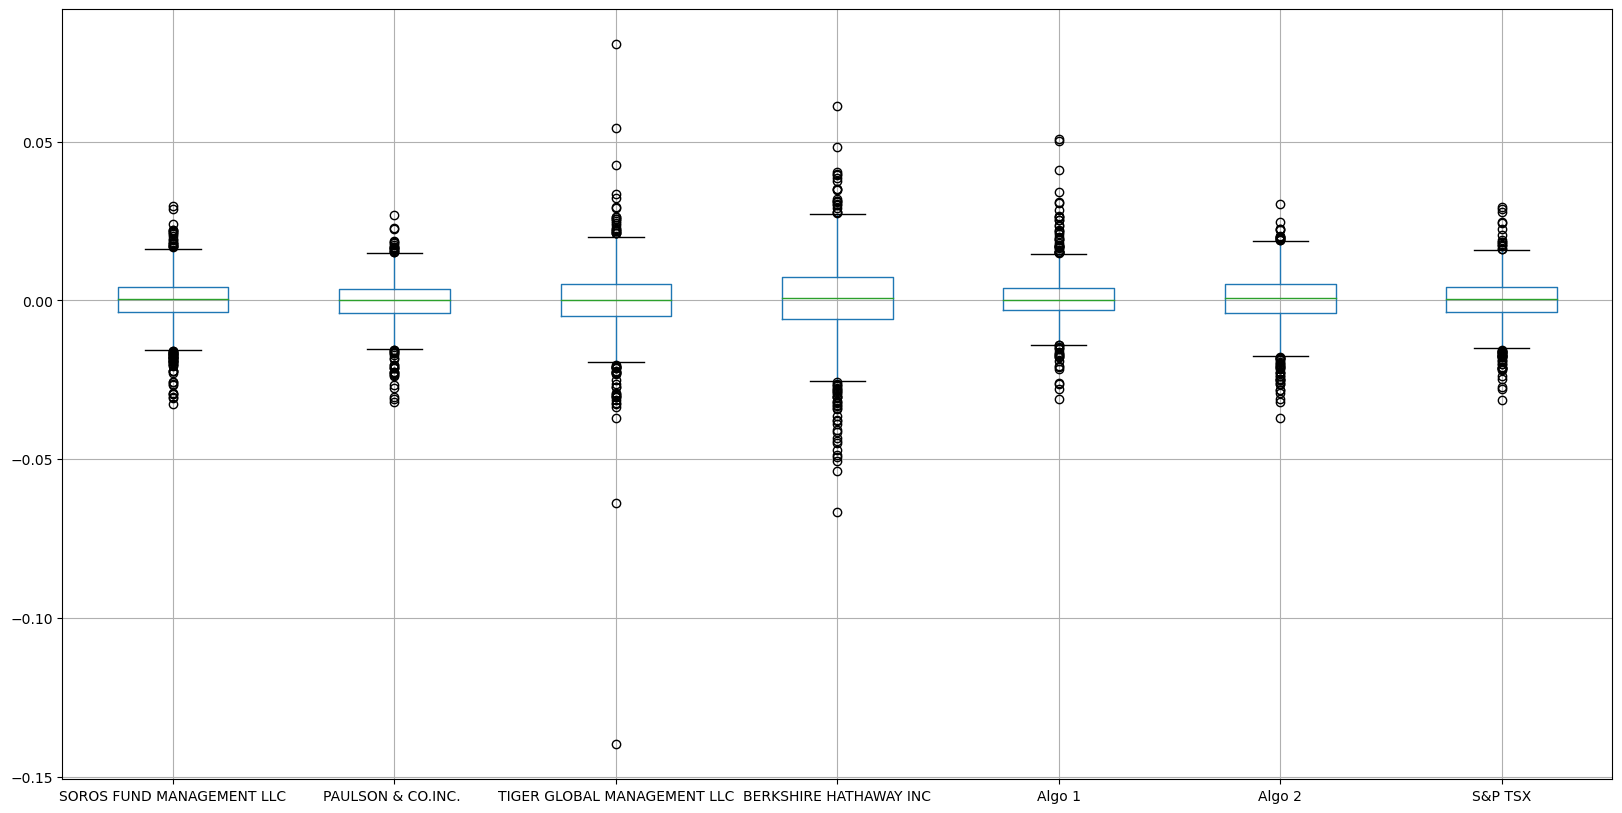

In [19]:
# Box plot to visually show risk
all_portfolios.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
all_daily_std = all_portfolios.std()
all_daily_std.sort_values(inplace=True)

### Determine which portfolios are riskier than the S&P TSX 60

In [21]:
# Calculate the daily standard deviation of S&P TSX 60
sp_risk = all_portfolios["S&P TSX"].std()
# Determine which portfolios are riskier than the S&P TSX 60
all_daily_std > sp_risk

PAULSON & CO.INC.              False
S&P TSX                        False
Algo 1                          True
SOROS FUND MANAGEMENT LLC       True
Algo 2                          True
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = all_daily_std * np.sqrt(252)
annual_std.sort_values(inplace=True)
annual_std

PAULSON & CO.INC.              0.110841
S&P TSX                        0.111664
Algo 1                         0.120470
SOROS FUND MANAGEMENT LLC      0.124259
Algo 2                         0.132177
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviatiob for All Portfolios'}, xlabel='Date'>

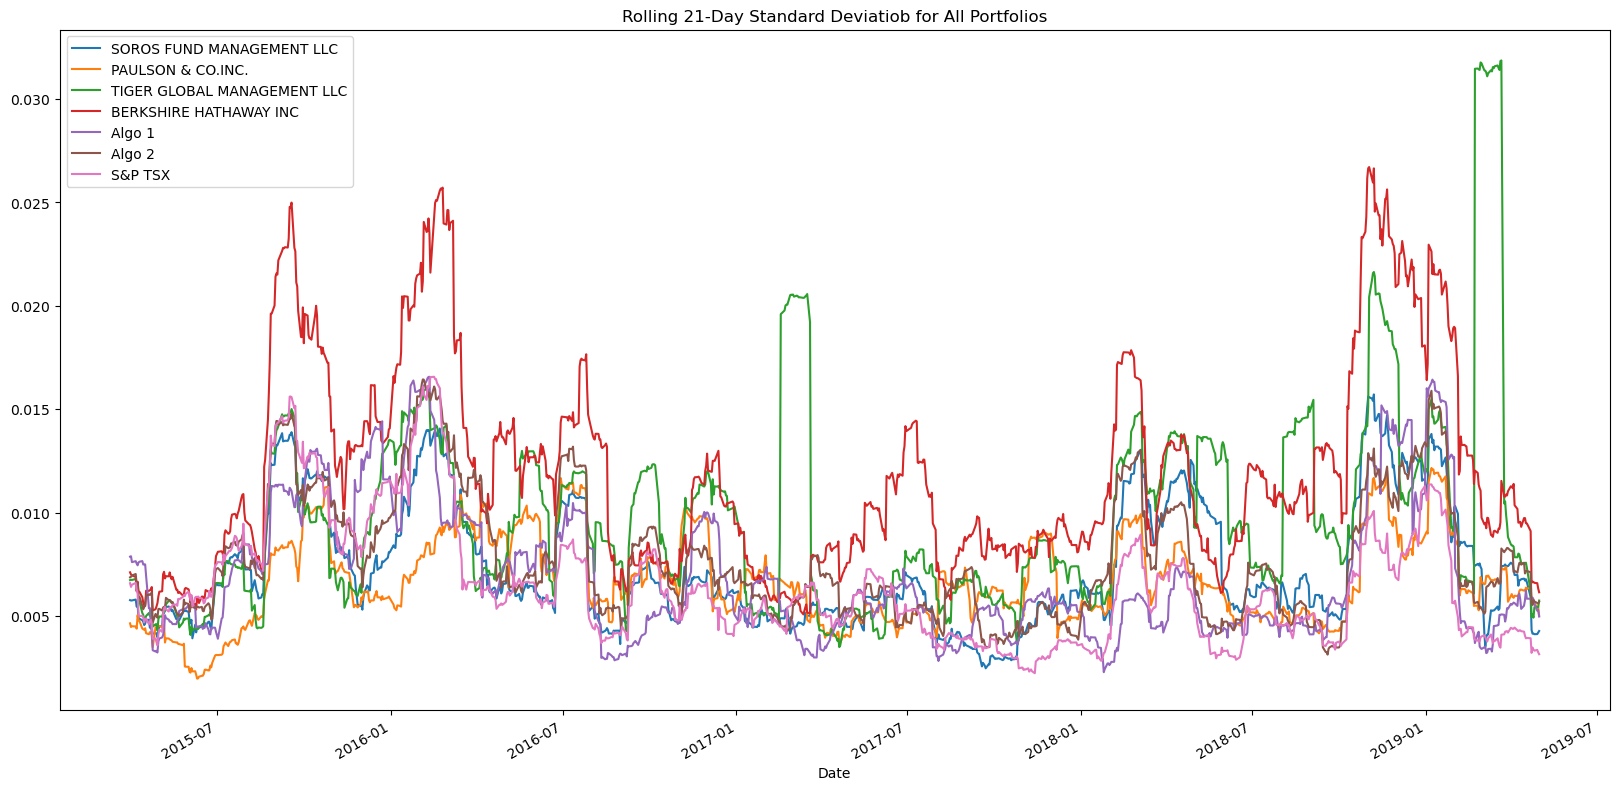

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
# Plot the rolling standard deviation
all_rolling = all_portfolios.rolling(window=21).std()
all_rolling.plot(figsize=(20,10), title="Rolling 21-Day Standard Deviatiob for All Portfolios")

### Calculate and plot the correlation

In [24]:
# Calculate the correlation
correlation = all_portfolios.corr()
# Display the correlation matrix
correlation

The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 21-Day Beta of TIGER GLOBAL MANAGEMENT LLC'}, xlabel='Date'>

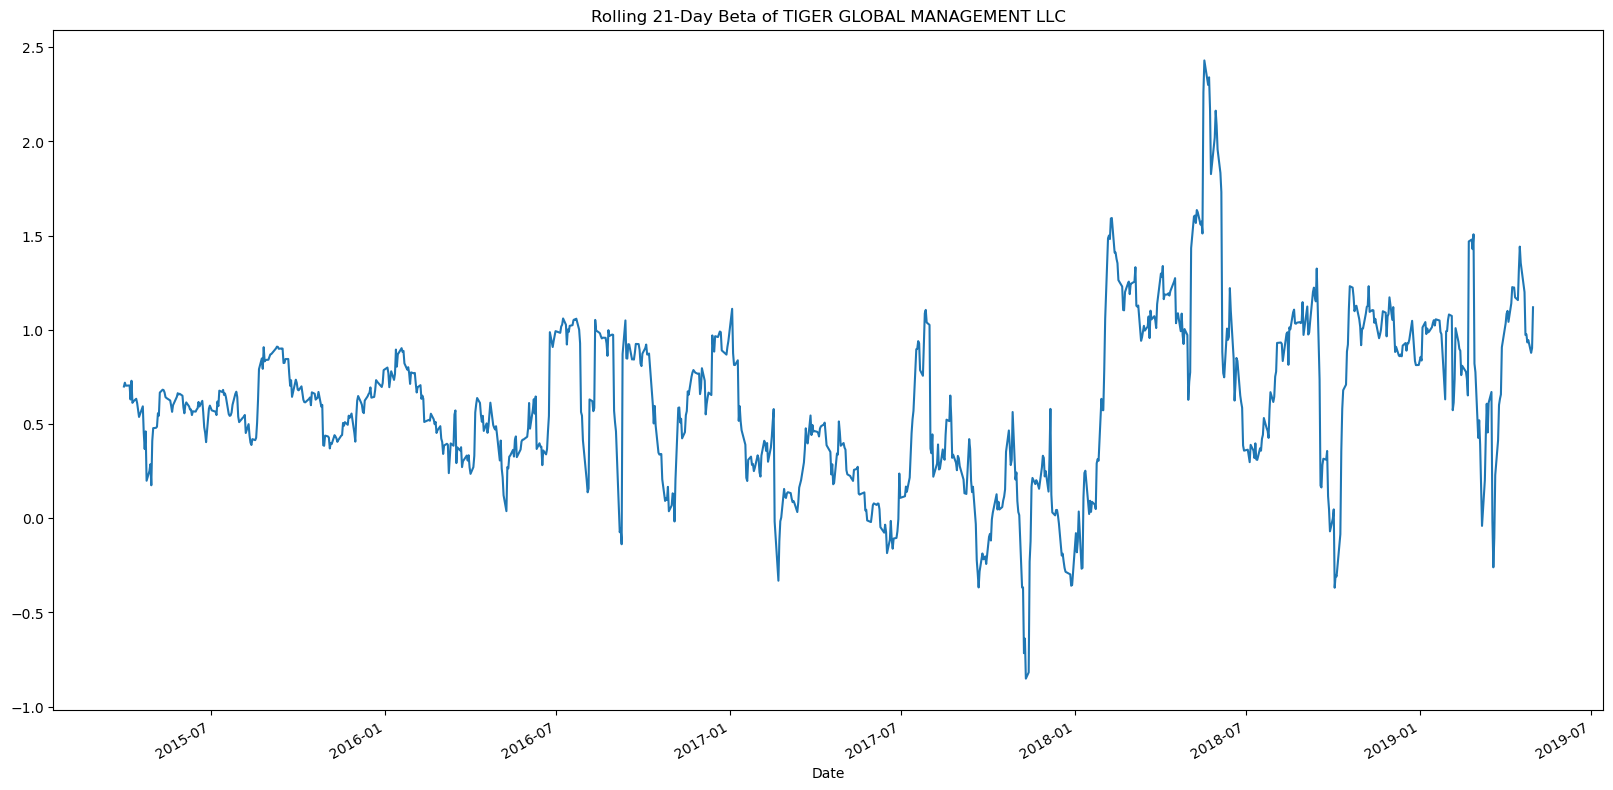

In [25]:
# Calculate covariance of a single portfolio
covar = all_portfolios["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=21).cov(all_portfolios["S&P TSX"])
covar
# Calculate variance of S&P TSX
var = all_portfolios["S&P TSX"].rolling(window=21).var()
var
# Computing beta
beta = covar / var
beta
# Plot beta trend
beta.plot(figsize=(20, 10), title="Rolling 21-Day Beta of TIGER GLOBAL MANAGEMENT LLC")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [26]:
# Use `ewm` to calculate the rolling window
all_portfolios.ewm(halflife=21).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517
...,...,...,...,...,...,...,...
2019-04-25,0.006819,0.006342,0.014811,0.010830,0.006526,0.007500,0.004700
2019-04-26,0.006819,0.006448,0.014764,0.010763,0.006433,0.007418,0.004628
2019-04-29,0.006708,0.006357,0.014575,0.010601,0.006378,0.007304,0.004564


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios
sharpe_ratios = (all_portfolios.mean() * 252) / (all_daily_std * np.sqrt(252))
sharpe_ratios.head()

Algo 1                    1.491514
Algo 2                    0.396817
BERKSHIRE HATHAWAY INC    0.467045
PAULSON & CO.INC.        -0.547594
S&P TSX                   0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

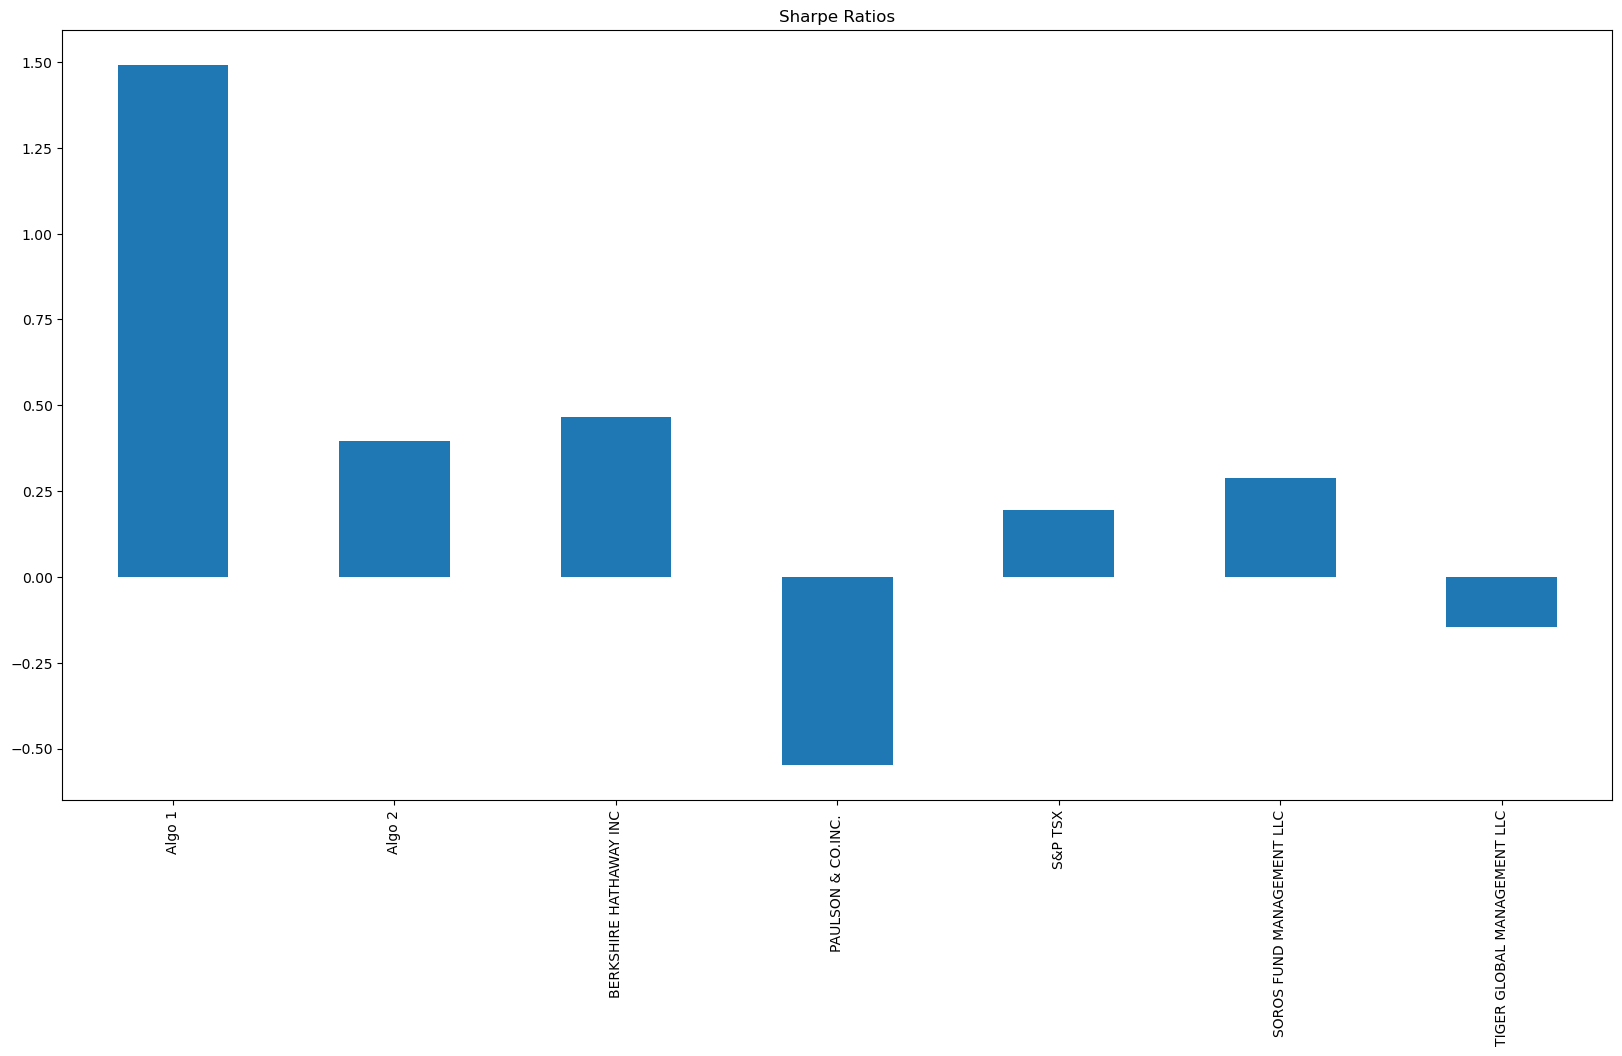

In [28]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(figsize = (20,10), kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

In [29]:
# Algorithmic strategy1 outperforms both the market and the whale portfolios,
# while algorithmic strategy2 outperforms the market and most whales portfolios,
# except for the Berkshire Hathaway Inc. portfolio.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# Reading data from 1st stock
l_returns_data = Path("../Starter_Code/Resources/l_historical.csv")
l_returns = pd.read_csv(
    l_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True
)
l_returns.drop(["Symbol"], axis = 1, inplace = True)
l_returns.sort_index(inplace=True)

In [31]:
# Reading data from 2nd stock
otex_returns_data = Path("../Starter_Code/Resources/otex_historical.csv")
otex_returns = pd.read_csv(
    otex_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True
)
otex_returns.drop(["Symbol"], axis = 1, inplace = True)
otex_returns.sort_index(inplace=True)

In [32]:
# Reading data from 3rd stock
shop_returns_data = Path("../Starter_Code/Resources/shop_historical.csv")
shop_returns = pd.read_csv(
    shop_returns_data, index_col="Date", infer_datetime_format=True, parse_dates=True
)
shop_returns.drop(["Symbol"], axis = 1, inplace = True)
shop_returns.sort_index(inplace=True)

In [33]:
# Combine all stocks in a single DataFrame
combined_portfolios = pd.concat([l_returns, otex_returns, shop_returns], axis="columns", join="inner")

In [34]:
# Reset Date index
combined_portfolios.index_col = "Date"

In [35]:
# Reorganize portfolio data by having a column per symbol
combined_portfolios.columns = ["L", "OTEX", "SHOP"]
combined_portfolios

,L,OTEX,SHOP
Date,,,
2018-01-02,57.99,43.58,132.06
2018-01-03,57.41,43.07,135.15
2018-01-04,57.42,42.91,137.46
2018-01-05,57.42,42.57,137.26
2018-01-08,56.86,42.16,139.51
...,...,...,...
2019-12-20,67.90,58.68,513.22
2019-12-23,67.68,57.89,511.62
2019-12-24,67.67,57.44,525.39


In [36]:
# Calculate daily returns
daily_re = combined_portfolios.pct_change()

# Drop NAs
daily_re.dropna(inplace=True)

# Display sample data
daily_re

,L,OTEX,SHOP
Date,,,
2018-01-03,-0.010002,-0.011703,0.023398
2018-01-04,0.000174,-0.003715,0.017092
2018-01-05,0.000000,-0.007924,-0.001455
2018-01-08,-0.009753,-0.009631,0.016392
2018-01-09,0.008969,-0.000712,-0.011254
...,...,...,...
2019-12-20,0.003547,0.024441,-0.005503
2019-12-23,-0.003240,-0.013463,-0.003118
2019-12-24,-0.000148,-0.007773,0.026915


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [37]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolios_daily_returns = daily_re.dot(weights)

# Display sample data
portfolios_daily_returns

Date
2018-01-03    0.000565
2018-01-04    0.004517
2018-01-05   -0.003126
2018-01-08   -0.000997
2018-01-09   -0.000999
                ...   
2019-12-20    0.007495
2019-12-23   -0.006607
2019-12-24    0.006331
2019-12-27    0.007995
2019-12-30   -0.015737
Length: 500, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [38]:
# Join your returns DataFrame to the original returns DataFrame
# combined_df --> the combined df of all daily returns
combined_df = pd.concat([daily_re, portfolios_daily_returns], axis="columns", join="inner")
combined_df.columns = ["L", "OTEX", "SHOP", "CUSTOM PORTFOLIO"]
combined_df
combined_all = pd.concat([combined_df, all_portfolios], axis="columns", join="inner")
# Rename the column
combined_all

,L,OTEX,SHOP,CUSTOM PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,,,,,
2018-01-03,-0.010002,-0.011703,0.023398,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.000174,-0.003715,0.017092,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,0.000000,-0.007924,-0.001455,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.009753,-0.009631,0.016392,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,0.008969,-0.000712,-0.011254,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097
...,...,...,...,...,...,...,...,...,...,...,...
2019-04-25,0.007398,0.006224,-0.003240,0.003461,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,-0.003672,0.000773,0.012628,0.003243,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.002918,-0.006181,0.013173,0.003303,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


In [39]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_all.dropna(inplace=True)
combined_all

,L,OTEX,SHOP,CUSTOM PORTFOLIO,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,,,,,
2018-01-03,-0.010002,-0.011703,0.023398,0.000565,0.004658,0.000027,0.001979,0.005676,-0.000890,0.008175,0.003774
2018-01-04,0.000174,-0.003715,0.017092,0.004517,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528
2018-01-05,0.000000,-0.007924,-0.001455,-0.003126,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869
2018-01-08,-0.009753,-0.009631,0.016392,-0.000997,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944
2018-01-09,0.008969,-0.000712,-0.011254,-0.000999,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097
...,...,...,...,...,...,...,...,...,...,...,...
2019-04-25,0.007398,0.006224,-0.003240,0.003461,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,-0.003672,0.000773,0.012628,0.003243,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.002918,-0.006181,0.013173,0.003303,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [40]:
# Calculate the annualized `std`
annual_stdev = combined_all.std() * np.sqrt(252)
annual_stdev

L                              0.162907
OTEX                           0.225703
SHOP                           0.504079
CUSTOM PORTFOLIO               0.224346
SOROS FUND MANAGEMENT LLC      0.145675
PAULSON & CO.INC.              0.114343
TIGER GLOBAL MANAGEMENT LLC    0.219833
BERKSHIRE HATHAWAY INC         0.227445
Algo 1                         0.120028
Algo 2                         0.137664
S&P TSX                        0.099121
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation'}, xlabel='Date'>

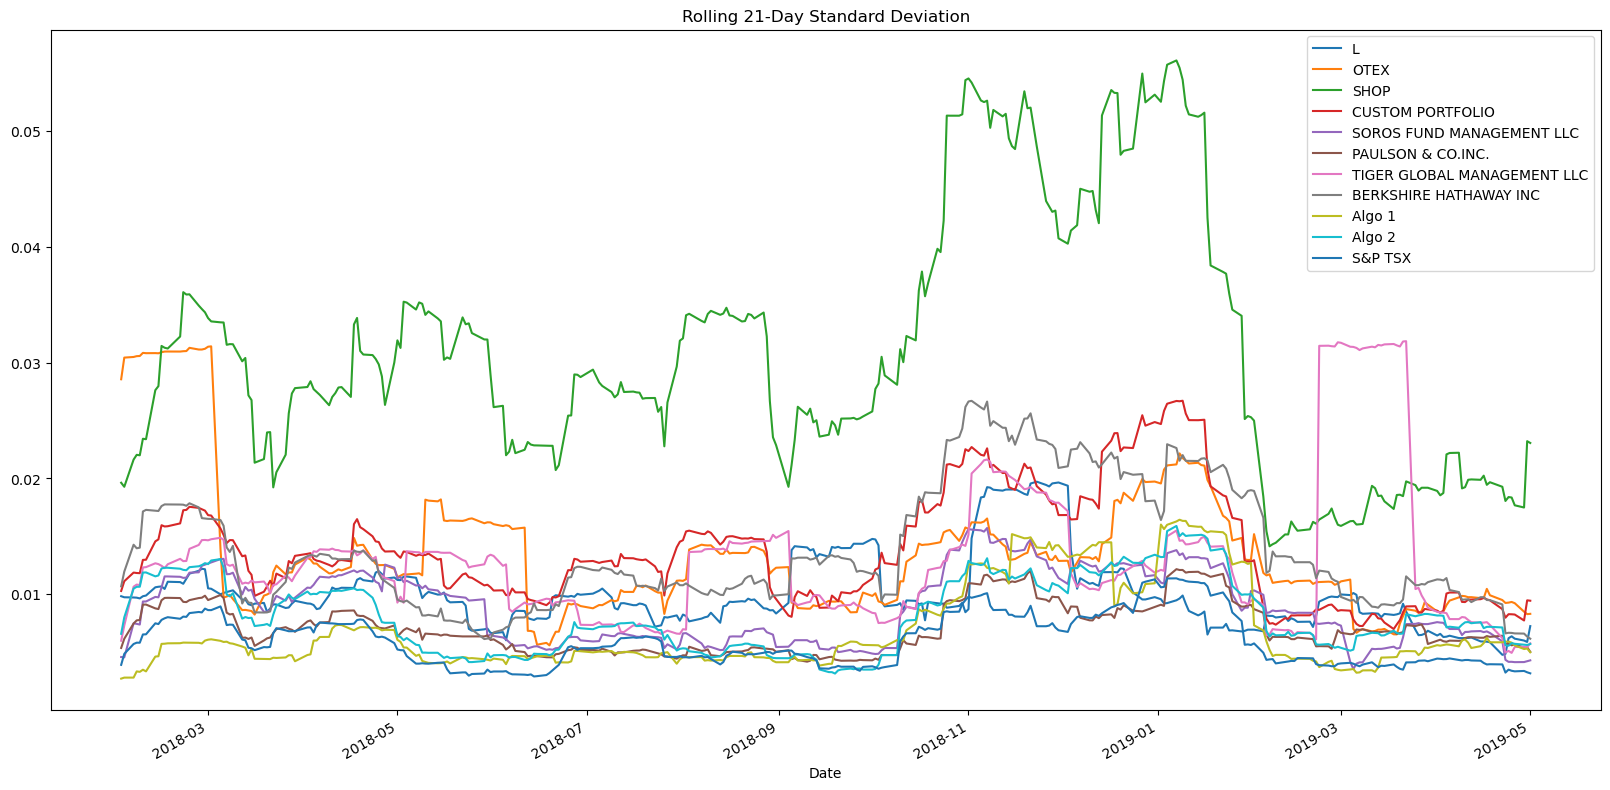

In [41]:
# Calculate rolling standard deviation
combined_all.rolling(window=21).std().dropna()
# Plot rolling standard deviation
combined_all.rolling(window=21).std().dropna().plot(figsize=(20, 10), title="Rolling 21-Day Standard Deviation")

### Calculate and plot the correlation

<AxesSubplot:>

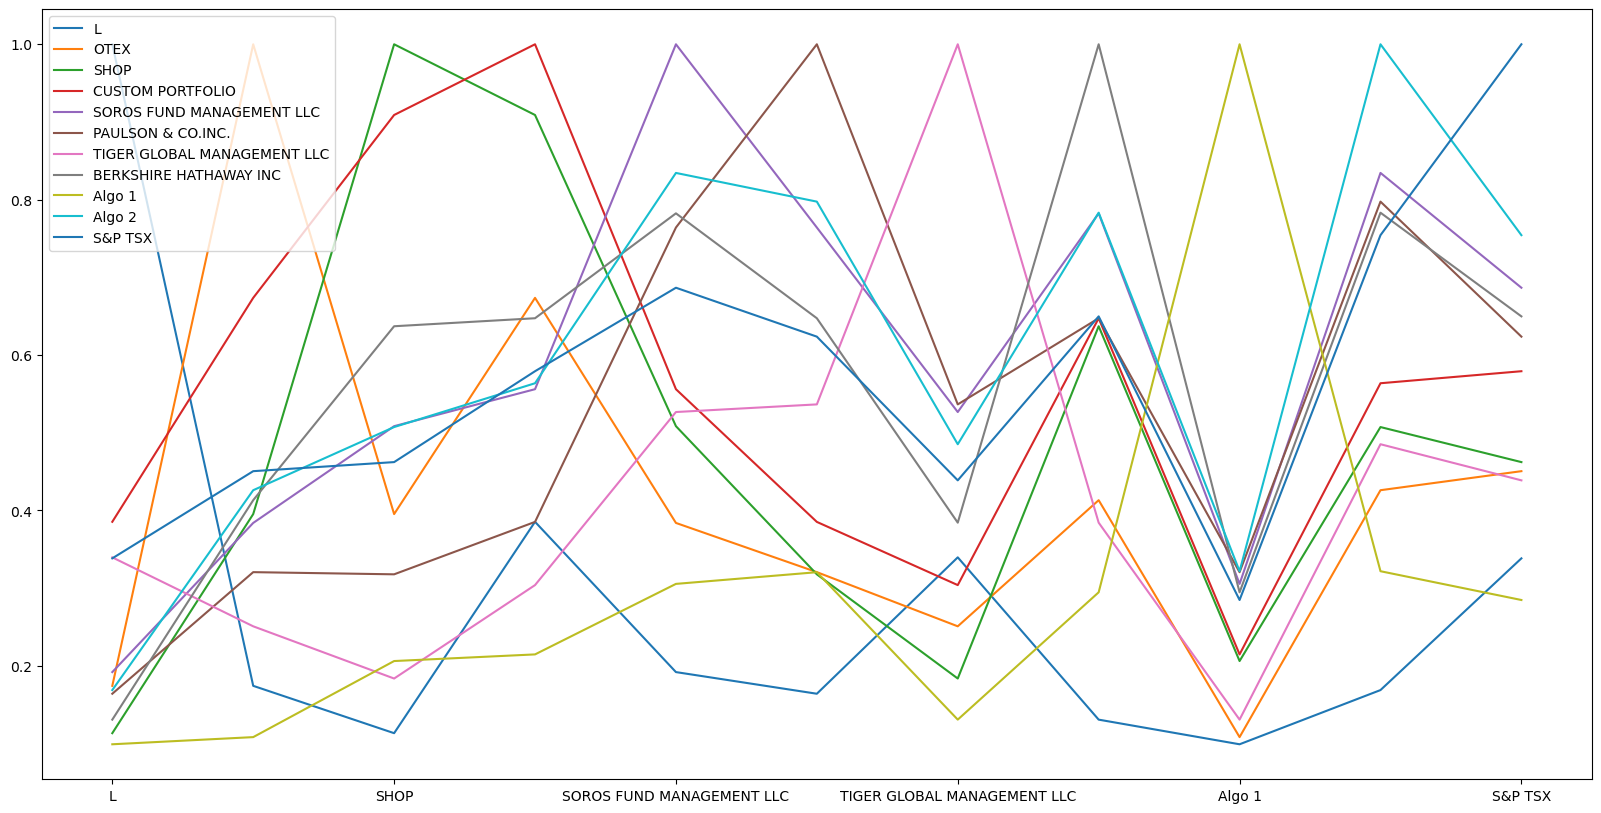

In [42]:
# Calculate and plot the correlation
combined_all.corr().plot(figsize=(20,10))

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<AxesSubplot:title={'center':'Rolling 60-Day Custom Portfolio Beta'}, xlabel='Date'>

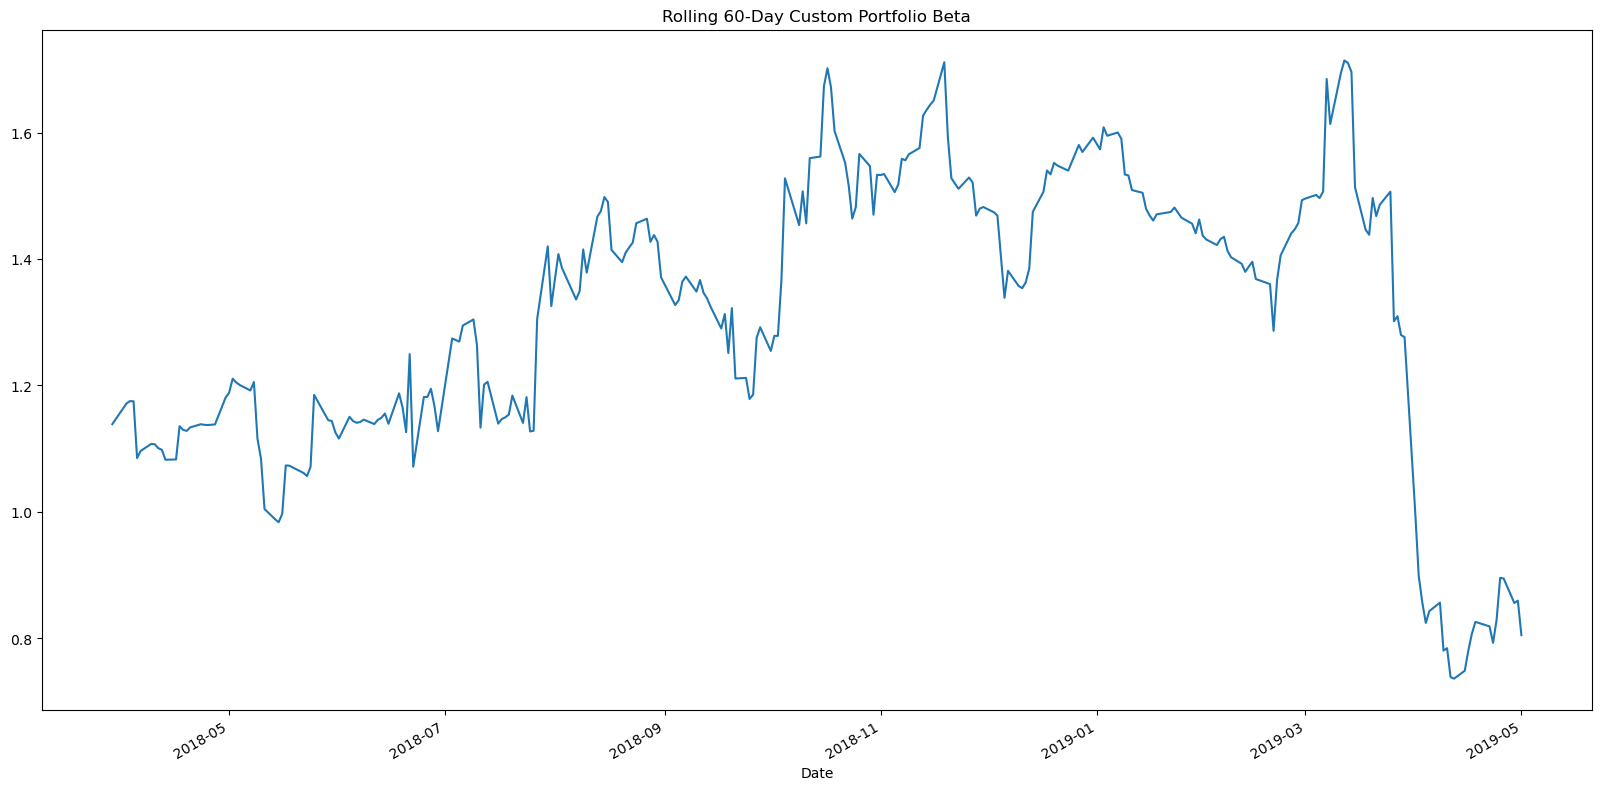

In [43]:
# Calculate and plot Beta
covariance = combined_all["CUSTOM PORTFOLIO"].rolling(window=60).cov(all_portfolios["S&P TSX"])
variance = all_portfolios["S&P TSX"].rolling(60).var()
beta = (covariance / variance)
beta.plot(figsize=(20, 10), title="Custom Portfolio 60-Day Rolling Beta")

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [44]:
# Calculate Annualized Sharpe Ratios
sharpe_rat = (combined_all.mean() * 252) / (combined_all.std() * np.sqrt(252))
sharpe_rat

L                              0.532599
OTEX                           0.762776
SHOP                           1.575294
CUSTOM PORTFOLIO               1.564547
SOROS FUND MANAGEMENT LLC     -0.088196
PAULSON & CO.INC.             -0.396282
TIGER GLOBAL MANAGEMENT LLC   -1.391612
BERKSHIRE HATHAWAY INC         0.195907
Algo 1                         1.901461
Algo 2                         0.021394
S&P TSX                        0.034651
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

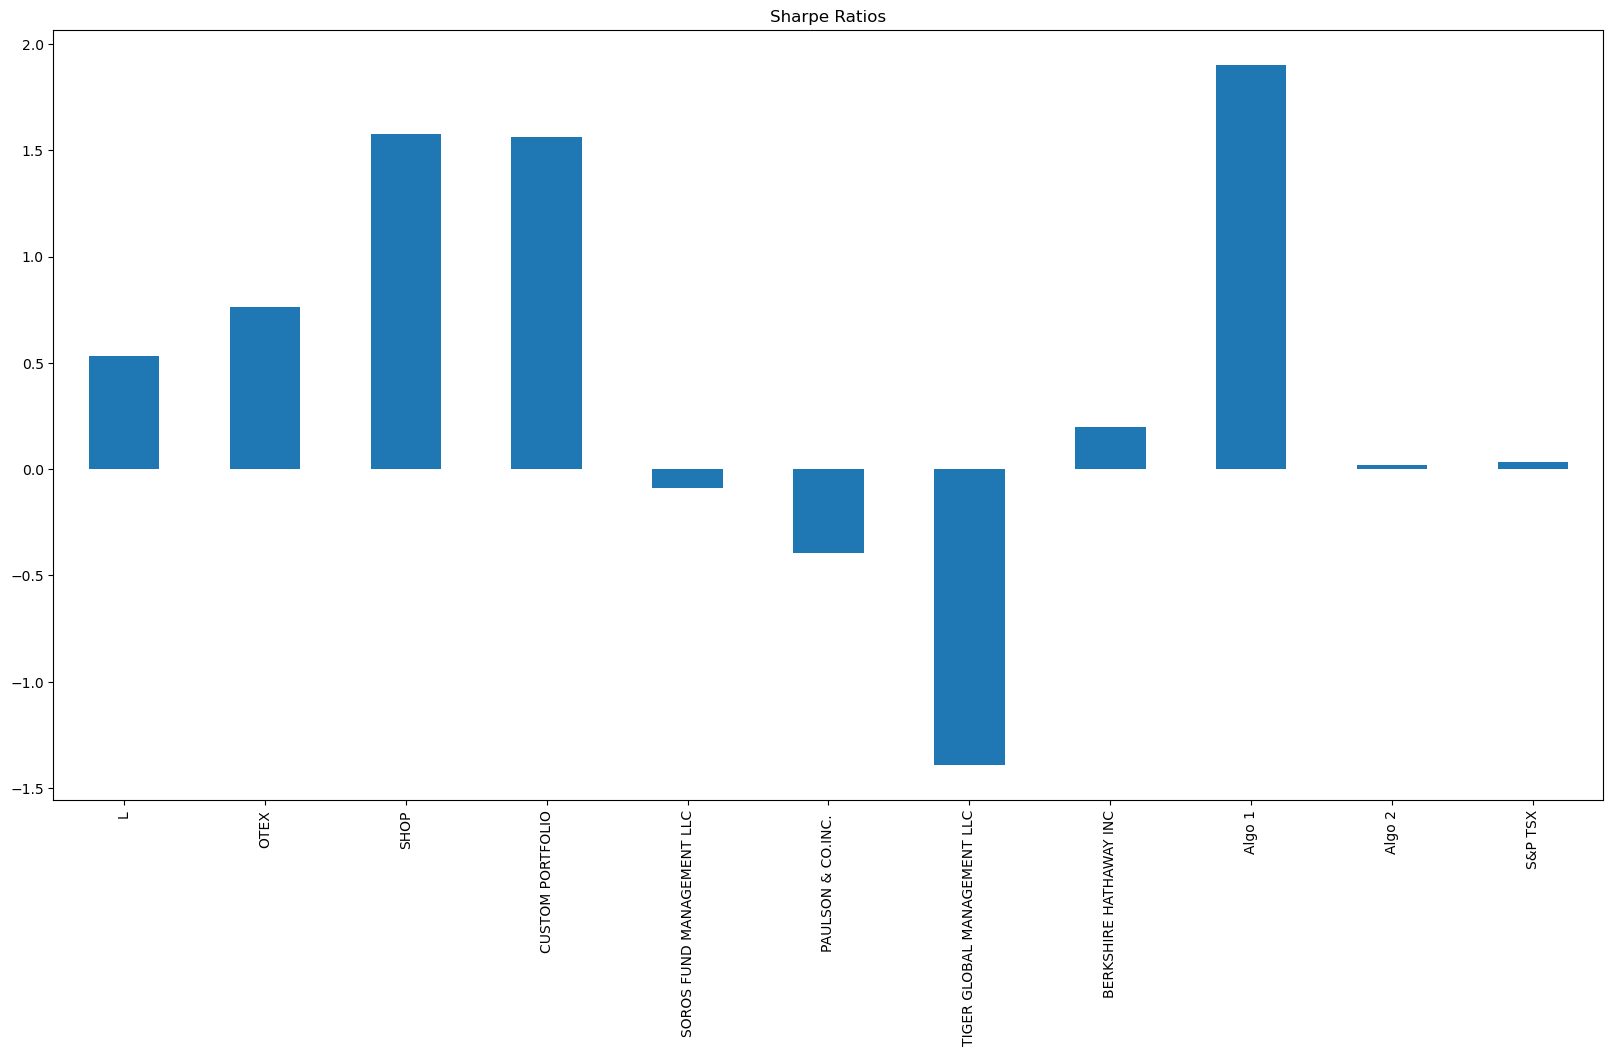

In [45]:
# Visualize the sharpe ratios as a bar plot
sharpe_rat.plot(figsize = (20,10), kind="bar", title="Sharpe Ratios")

### How does your portfolio do?

Write your answer here!

In [46]:
# The custom portfolio outperforms most of the other portfolios but not the algorithmic 1.